In [23]:
import cv2
import numpy as np

def nothing(x):
    pass

# Load image
image = np.array(Image.open(r"C:\wd\MSBL-Parser\notebooks\scoreboard2.jpg"))

# Create a window
cv2.namedWindow('image')

# Create trackbars for color change
# Hue is from 0-179 for Opencv
cv2.createTrackbar('HMin', 'image', 0, 179, nothing)
cv2.createTrackbar('SMin', 'image', 0, 255, nothing)
cv2.createTrackbar('VMin', 'image', 0, 255, nothing)
cv2.createTrackbar('HMax', 'image', 0, 179, nothing)
cv2.createTrackbar('SMax', 'image', 0, 255, nothing)
cv2.createTrackbar('VMax', 'image', 0, 255, nothing)

# Set default value for Max HSV trackbars
cv2.setTrackbarPos('HMax', 'image', 179)
cv2.setTrackbarPos('SMax', 'image', 255)
cv2.setTrackbarPos('VMax', 'image', 255)

# Initialize HSV min/max values
hMin = sMin = vMin = hMax = sMax = vMax = 0
phMin = psMin = pvMin = phMax = psMax = pvMax = 0

while(1):
    # Get current positions of all trackbars
    hMin = cv2.getTrackbarPos('HMin', 'image')
    sMin = cv2.getTrackbarPos('SMin', 'image')
    vMin = cv2.getTrackbarPos('VMin', 'image')
    hMax = cv2.getTrackbarPos('HMax', 'image')
    sMax = cv2.getTrackbarPos('SMax', 'image')
    vMax = cv2.getTrackbarPos('VMax', 'image')

    # Set minimum and maximum HSV values to display
    lower = np.array([hMin, sMin, vMin])
    upper = np.array([hMax, sMax, vMax])

    # Convert to HSV format and color threshold
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    result = cv2.bitwise_and(image, image, mask=mask)

    # Print if there is a change in HSV value
    if((phMin != hMin) | (psMin != sMin) | (pvMin != vMin) | (phMax != hMax) | (psMax != sMax) | (pvMax != vMax) ):
        print("(hMin = %d , sMin = %d, vMin = %d), (hMax = %d , sMax = %d, vMax = %d)" % (hMin , sMin , vMin, hMax, sMax , vMax))
        phMin = hMin
        psMin = sMin
        pvMin = vMin
        phMax = hMax
        psMax = sMax
        pvMax = vMax

    # Display result image
    cv2.imshow('image', result)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 3 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 8 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 11 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 14 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 22 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 25 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 34 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 36 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 39 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 45 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 48 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 50 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 53 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 

KeyboardInterrupt: 

In [ ]:
print(tesserocr.tesseract_version())  # print tesseract-ocr version
print(tesserocr.get_languages())  # prints tessdata path and list of available languages

In [ ]:
cnt = 0
skipXFrames = 20
while cnt < 25:
    while i < len(res):
        entry = res[i]
        if len(entry) == 0:
            i+=1
            continue
        if entry['Type'] == 'IN_GAME':
            for side in ['left', 'right']:
                cropped = Image.fromarray(frames[i]).crop(getSubImageBox(BOUNDING_BOXES['IN_GAME']['Score'], side))
                cv2.imwrite(f'../tests/qualityData/score/{side}/score_{side}_{cnt}.jpg', np.array(cropped))
            cnt += 1
            i += skipXFrames
        if cnt >= 25:
            break
        i += 1


In [ ]:
import os
import glob

class TestRunner(object):
    QUALITY_TESTS = os.path.join('..', 'tests', 'qualityData')

    def __init__(self):
        pass

    def _getTestNumber(self,fileName:str) -> int:
        return int(fileName.split('_')[-1].split('.')[0])

    def _getBaseFolderPath(self, moment:str, testCase:str, side:str) -> str:
        return os.path.join(TestRunner.QUALITY_TESTS, testCase.lower(), side)
    
    def _getCorrectResults(self, moment:str, testCase:str, side:str) -> list:
        with open(os.path.join(self._getBaseFolderPath(moment, testCase, side), 'labels.txt')) as file:
            lines = {idx:line.rstrip() for idx,line in enumerate(file)}
        return lines

    def _convertToCorrectType(self, value:str, testCase:str):
        if testCase.lower().startswith('score'):
            return int(value)
        return value

    def getTestResults(self, moment:str, testCase:str, side:str, considerBelowXConfidenceAsFailing:float=70, debug:bool=False):
        imgs = {}
        totalTestCases = 0
        correct = 0
        confidences = []
        answers = self._getCorrectResults(moment, testCase, side)
        for filename in glob.glob(os.path.join(self._getBaseFolderPath(moment, testCase, side),'*.jpg')):
            im=Image.open(filename)
            testNo = self._getTestNumber(filename)
            try:
                parsedVal, confidences = parseFromImage(im, BOUNDING_BOXES[moment][testCase], side, debug=debug)
            except:
                parsedVal, confidences = '', [0]
            totalTestCases += 1
            confidence = np.min(confidences)
            if parsedVal == self._convertToCorrectType(answers[testNo], testCase) and confidence >= considerBelowXConfidenceAsFailing:
                correct += 1
            elif debug:
                display(f'Failed to properly parse the following image / had low confidence | testNo={testNo}')
                display(f'Correct value `{answers[testNo]}`, parsed value `{parsedVal}`, passing confidence was {considerBelowXConfidenceAsFailing}, actual confidence was {confidence}')
                display(im)
            confidences.append(confidence)
        print(f'Final results for {testCase} | {side} ')
        print(f'% correct = {100.0*correct/totalTestCases}% ({correct} out of {totalTestCases})')
        print(f'Confidence (p0, p25, p50, p75): {np.percentile(confidences, [0, 25, 50, 75])}')
            

In [ ]:
tests = TestRunner()
tests.getTestResults('IN_GAME', 'Score', 'left', debug=True)

In [ ]:
im.resize((int(im.size[0]*1.5), int(im.size[1])), resample=Image.NEAREST)

In [ ]:
def imageTransformationForScore(im:Image) -> Image:
    tmp = im
    tmp = cv2.cvtColor(np.array(tmp), cv2.COLOR_BGR2GRAY)
    (th, newimg) = cv2.threshold(tmp, 215, 255, cv2.THRESH_BINARY)
    #lower = np.array([0,0,196])
    #upper = np.array([179,39,255])
    #mask = cv2.inRange(tmp, lower, upper)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4,4))
    opening = cv2.morphologyEx(newimg, cv2.MORPH_OPEN, kernel)
    kernel = np.ones((1,1),np.uint8)
    erosion = cv2.erode(opening,kernel,iterations = 5)
    return Image.fromarray(255-erosion)

im = Image.open(r"C:\wd\MSBL-Parser\tests\qualityData\in_game\score\left\score_left_10.jpg")
im = imageTransformation(im, 'Score')[0]
im.save("2.jpg")
display(im)

for val in [tesserocr.PSM.OSD_ONLY, tesserocr.PSM.AUTO_OSD, tesserocr.PSM.AUTO_ONLY, tesserocr.PSM.AUTO, tesserocr.PSM.SINGLE_COLUMN, tesserocr.PSM.SINGLE_BLOCK_VERT_TEXT, tesserocr.PSM.SINGLE_BLOCK, tesserocr.PSM.SINGLE_LINE, tesserocr.PSM.SINGLE_WORD, tesserocr.PSM.CIRCLE_WORD, tesserocr.PSM.SINGLE_CHAR, tesserocr.PSM.RAW_LINE]:
    display(f'PSM option: {val}')
    display(parseImage(im,  numbersOnly=True, tesserocrOptions={'psm': val, 'oem':1}))

In [1]:
import sys
sys.path.append("..") # almost every `.py` need this

from src.helpers import KeyItemDetails, ParsingConfig, GamePhaseDetail, KeyItemDetail, Coordinates, GamePhaseDetails
from src.constants import FileType, GamePhase, GameSide, KeyItem, RESOLUTION
from src.parsing import parse, getFramesFromFileContentUsingParsingConfig

gamePhaseDetails = GamePhaseDetails([
    GamePhaseDetail(
        gamePhase=GamePhase.IN_GAME,
        keyItemDetails= KeyItemDetails([
            KeyItemDetail(
                Coordinates(875,0,1040,65),
                KeyItem.TIME,
                GameSide.NONE,
                numbersOnly=False,
                tesserocrOptions={}
            ),
            KeyItemDetail(
                Coordinates(185,85,400,125),
                KeyItem.TEAM_NAME,
                GameSide.LEFT,
                numbersOnly=False,
                tesserocrOptions={}
            ),
            KeyItemDetail(
                Coordinates(185,85,400,125).flipAlongYAxis(),
                KeyItem.TEAM_NAME,
                GameSide.RIGHT,
                numbersOnly=False,
                tesserocrOptions={}
            ),
            KeyItemDetail(
                Coordinates(700,20,825,84),
                KeyItem.SCORE,
                GameSide.LEFT,
                numbersOnly=True,
                tesserocrOptions={}
            ),
            KeyItemDetail(
                Coordinates(700,20,825,84).flipAlongYAxis(),
                KeyItem.SCORE,
                GameSide.RIGHT,
                numbersOnly=True,
                tesserocrOptions={}
            ),
        ]),
        identifyingKeyItem=(KeyItem.TIME, GameSide.NONE)
    ),
    GamePhaseDetail(
        gamePhase=GamePhase.GOAL_SCORED_LEFT_HAND_SIDE,
        keyItemDetails= KeyItemDetails([
            KeyItemDetail(
                Coordinates(250,850,380,900),
                KeyItem.TIME,
                GameSide.NONE,
                numbersOnly=False,
                tesserocrOptions={}
            ),
            KeyItemDetail(
                Coordinates(1100,735,1330,900),
                KeyItem.SCORE,
                GameSide.LEFT,
                numbersOnly=True,
                tesserocrOptions={}
            ),
            KeyItemDetail(
                Coordinates(1450,735,1680,900),
                KeyItem.SCORE,
                GameSide.RIGHT,
                numbersOnly=True,
                tesserocrOptions={}
            ),
            KeyItemDetail(
                Coordinates(490,850,900,900),
                KeyItem.TEAM_NAME,
                GameSide.LEFT,
                numbersOnly=False,
                tesserocrOptions={}
            ),
            KeyItemDetail(
                Coordinates(250,925,1000,1000),
                KeyItem.FLAVOR_TEXT,
                GameSide.NONE,
                numbersOnly=True,
                tesserocrOptions={}
            )
        ]),
        identifyingKeyItem=(KeyItem.TIME, GameSide.NONE)
    ),
    GamePhaseDetail(
        gamePhase=GamePhase.GOAL_SCORED_RIGHT_HAND_SIDE,
        keyItemDetails= KeyItemDetails([
            KeyItemDetail(
                Coordinates(250,850,380,900).flipAlongYAxis(),
                KeyItem.TIME,
                GameSide.NONE,
                numbersOnly=False,
                tesserocrOptions={}
            ),
            KeyItemDetail(
                Coordinates(1100,735,1330,900).flipAlongYAxis(),
                KeyItem.SCORE,
                GameSide.LEFT,
                numbersOnly=True,
                tesserocrOptions={}
            ),
            KeyItemDetail(
                Coordinates(1450,735,1680,900).flipAlongYAxis(),
                KeyItem.SCORE,
                GameSide.RIGHT,
                numbersOnly=True,
                tesserocrOptions={}
            ),
            KeyItemDetail(
                Coordinates(490,850,900,900).flipAlongYAxis(),
                KeyItem.TEAM_NAME,
                GameSide.RIGHT,
                numbersOnly=False,
                tesserocrOptions={}
            ),
            KeyItemDetail(
                Coordinates(250,925,1000,1000).flipAlongYAxis(),
                KeyItem.FLAVOR_TEXT,
                GameSide.NONE,
                numbersOnly=True,
                tesserocrOptions={}
            )
        ]),
        identifyingKeyItem=(KeyItem.TIME, GameSide.NONE)
    ),
    GamePhaseDetail(
        gamePhase=GamePhase.IN_GAME_FINAL_RESULT_LEFT_HAND_SIDE,
        keyItemDetails= KeyItemDetails([
            KeyItemDetail(
                Coordinates(1100,735,1330,900),
                KeyItem.SCORE,
                GameSide.LEFT,
                numbersOnly=True,
                tesserocrOptions={}
            ),
            KeyItemDetail(
                Coordinates(330,850,700,900),
                KeyItem.TEAM_NAME,
                GameSide.LEFT,
                numbersOnly=False,
                tesserocrOptions={}
            ),
            KeyItemDetail(
                Coordinates(1450,735,1680,900),
                KeyItem.SCORE,
                GameSide.RIGHT,
                numbersOnly=True,
                tesserocrOptions={}
            ),
            KeyItemDetail(
                Coordinates(250,925,1000,1000),
                KeyItem.FLAVOR_TEXT,
                GameSide.NONE,
                numbersOnly=True,
                tesserocrOptions={}
            )
        ]),
        identifyingKeyItem=(KeyItem.SCORE, GameSide.LEFT)
    ),
    GamePhaseDetail(
        gamePhase=GamePhase.IN_GAME_FINAL_RESULT_RIGHT_HAND_SIDE,
        keyItemDetails= KeyItemDetails([
                    KeyItemDetail(
                        Coordinates(1100,735,1330,900).flipAlongYAxis(),
                        KeyItem.SCORE,
                        GameSide.LEFT,
                        numbersOnly=True,
                        tesserocrOptions={}
                    ),
                    KeyItemDetail(
                        Coordinates(1450,735,1680,900).flipAlongYAxis(),
                        KeyItem.SCORE,
                        GameSide.RIGHT,
                        numbersOnly=True,
                        tesserocrOptions={}
                    ),
                KeyItemDetail(
                    Coordinates(330,850,700,900).flipAlongYAxis(),
                    KeyItem.TEAM_NAME,
                    GameSide.RIGHT,
                    numbersOnly=False,
                    tesserocrOptions={}
                ),
                KeyItemDetail(
                    Coordinates(250,925,1000,1000).flipAlongYAxis(),
                    KeyItem.FLAVOR_TEXT,
                    GameSide.NONE,
                    numbersOnly=True,
                    tesserocrOptions={}
                )
            
    ]),
        identifyingKeyItem=(KeyItem.SCORE, GameSide.LEFT)
    )
])



parseConfig = ParsingConfig(\
    videoOrImageToParsePath         =  r"C:\Users\hkuser\Videos\clip.mkv",\
    FileType                        = FileType.VIDEO,\
    gamePhaseDetails                = gamePhaseDetails,\
    imageCacheFolderPath            = r"..\src\data",\
    resolution                      = RESOLUTION,\
    processEveryXSecondsFromVideo   = 0.5,\
    fpsOfInputVideo                 = 30,\
    outputFolder                    = 'output',\
    debug                           = False,\
    ignoreParsingErrors             = False,\
)



In [ ]:
result, all = parse(parseConfig)

In [ ]:
from PIL import Image
from src.parsing import tryProcessFrame,ImageStore
import numpy as np
result = tryProcessFrame(np.array(Image.open(r"C:\wd\MSBL-Parser\notebooks\output\frame46980.jpg")), 0, parseConfig.gamePhaseDetails, parseConfig.gameSettings, True, False, storedImageCache=ImageStore(parseConfig.imageCacheFolderPath, parseConfig.gamePhaseDetails), displayImages=True)


In [ ]:
result.games

In [ ]:
for game, parsedgame in result.games.items():
    display(game)
    if len(parsedgame.keyMoments) == 0:
        continue
    for i in [0,2,-5,-1]:
        frame = parsedgame.parsedFrames[i]
        display(frame.getValue(KeyItem.TIME, GameSide.NONE))
        display(frame.image)

In [ ]:
result.games['Game #3'].parsedFrames[1].getValue(KeyItem.TIME, GameSide.NONE)

In [ ]:
result.games['Game #3'].parsedFrames[1].image

In [ ]:
result.dumpAllUnparseableImages('../src/data')

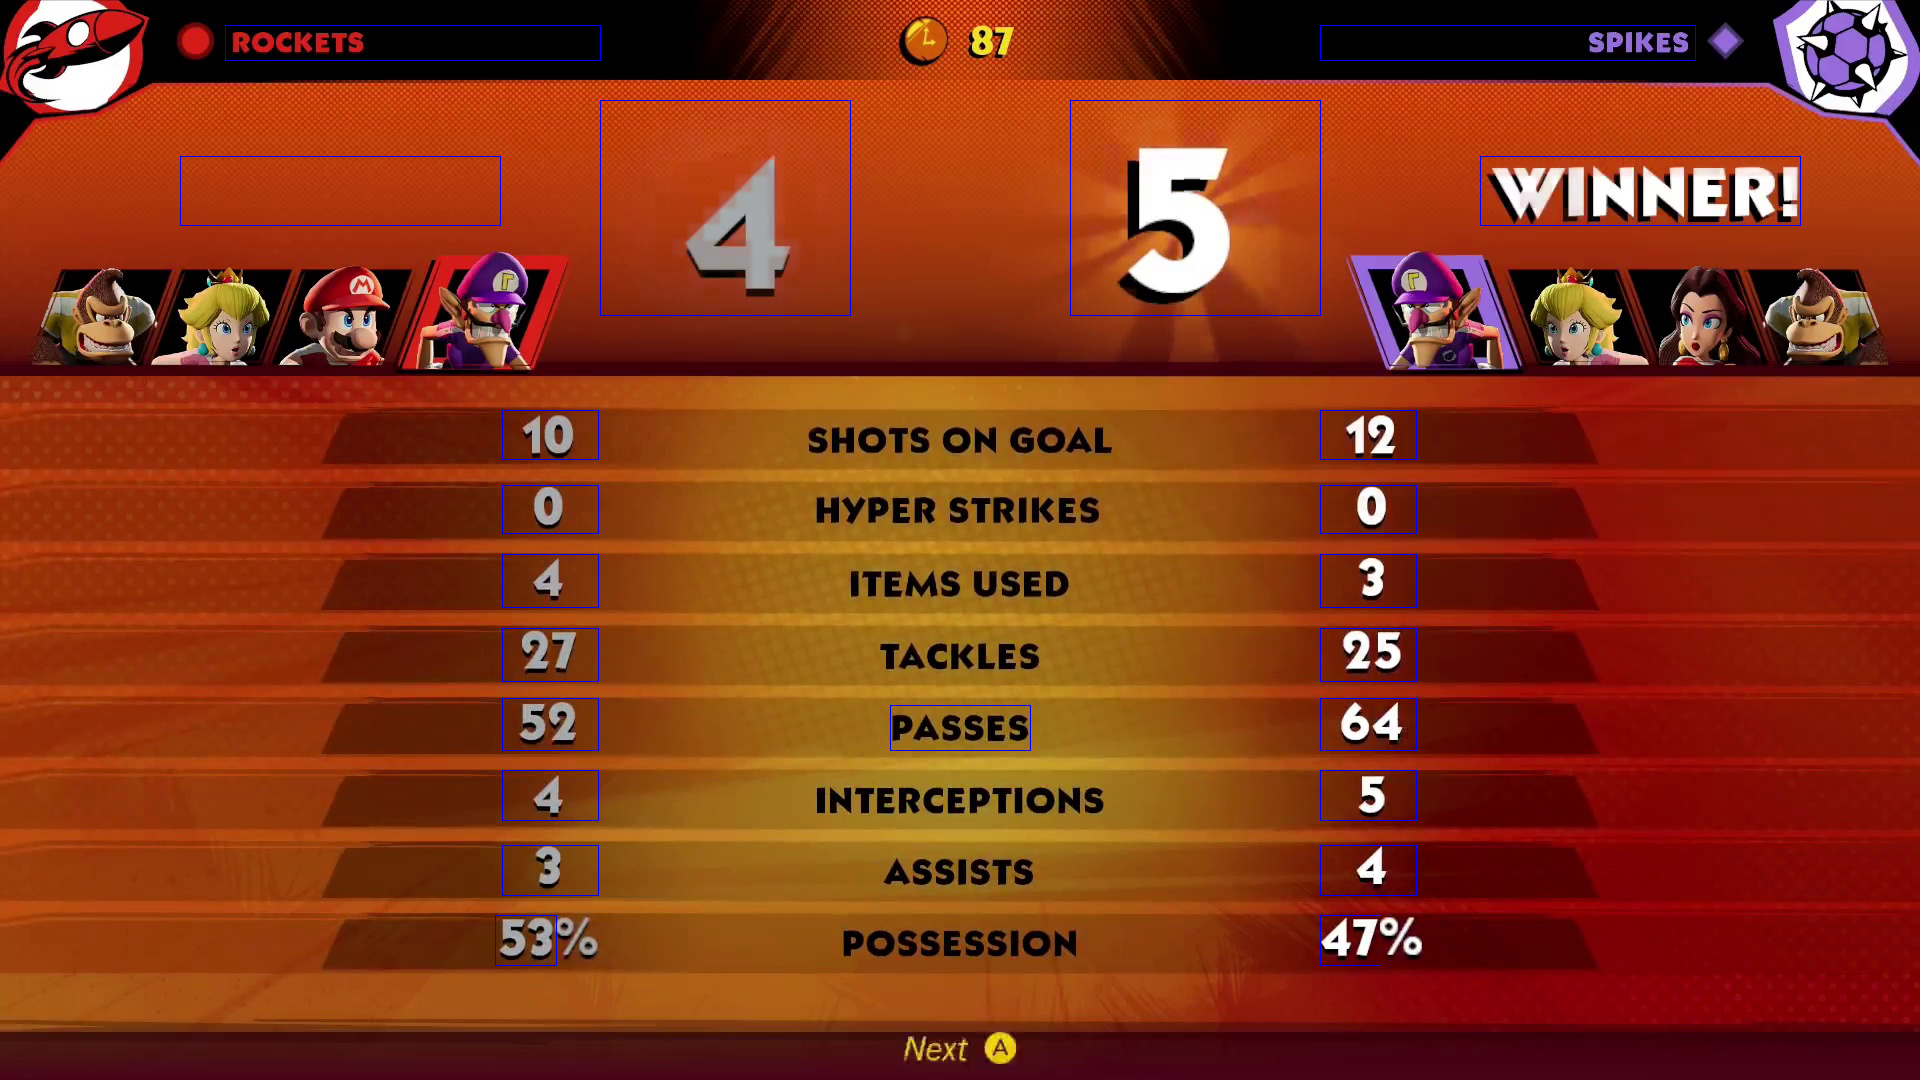

In [3]:
from src.parsing import drawBoxes, runOcrOnImage, imageTransformation
from PIL import Image
from src.constants import SCOREBOARD_STATS
keyItems = [
     KeyItemDetail(coords=Coordinates(left=890, upper=705, right=1030, lower=750), keyItem=KeyItem.SCOREBOARD_PASSES_CHECK, side=GameSide.NONE, numbersOnly=False, tesserocrOptions={"tessedit_char_whitelist": "PASE"}),
KeyItemDetail(coords=Coordinates(left=600, upper=100, right=850, lower=315), keyItem=KeyItem.SCORE, side=GameSide.LEFT, numbersOnly=True, tesserocrOptions={}),
 KeyItemDetail(coords=Coordinates(left=225, upper=25, right=600, lower=60), keyItem=KeyItem.TEAM_NAME, side=GameSide.LEFT, numbersOnly=False, tesserocrOptions={}),
 KeyItemDetail(coords=Coordinates(left=502, upper=410, right=598, lower=459), keyItem=KeyItem.SHOTS_ON_GOAL, side=GameSide.LEFT, numbersOnly=True, tesserocrOptions={}),
 KeyItemDetail(coords=Coordinates(left=502, upper=485, right=598, lower=533), keyItem=KeyItem.HYPER_STRIKES, side=GameSide.LEFT, numbersOnly=True, tesserocrOptions={}),
 KeyItemDetail(coords=Coordinates(left=502, upper=554, right=598, lower=607), keyItem=KeyItem.ITEMS_USED, side=GameSide.LEFT, numbersOnly=True, tesserocrOptions={}),
 KeyItemDetail(coords=Coordinates(left=502, upper=628, right=598, lower=681), keyItem=KeyItem.TACKLES, side=GameSide.LEFT, numbersOnly=True, tesserocrOptions={}),
 KeyItemDetail(coords=Coordinates(left=502, upper=698, right=598, lower=750), keyItem=KeyItem.PASSES, side=GameSide.LEFT, numbersOnly=True, tesserocrOptions={}),
 KeyItemDetail(coords=Coordinates(left=502, upper=770, right=598, lower=820), keyItem=KeyItem.INTERCEPTIONS, side=GameSide.LEFT, numbersOnly=True, tesserocrOptions={}),
 KeyItemDetail(coords=Coordinates(left=502, upper=845, right=598, lower=895), keyItem=KeyItem.ASSISTS, side=GameSide.LEFT, numbersOnly=True, tesserocrOptions={}),
 KeyItemDetail(coords=Coordinates(left=495, upper=915, right=556, lower=965), keyItem=KeyItem.POSESSION, side=GameSide.LEFT, numbersOnly=True, tesserocrOptions={}),
 KeyItemDetail(coords=Coordinates(left=1070, upper=100, right=1320, lower=315), keyItem=KeyItem.SCORE, side=GameSide.RIGHT, numbersOnly=True, tesserocrOptions={}),
 KeyItemDetail(coords=Coordinates(left=1320, upper=25, right=1695, lower=60), keyItem=KeyItem.TEAM_NAME, side=GameSide.RIGHT, numbersOnly=False, tesserocrOptions={}),
 KeyItemDetail(coords=Coordinates(left=1320, upper=410, right=1416, lower=459), keyItem=KeyItem.SHOTS_ON_GOAL, side=GameSide.RIGHT, numbersOnly=True, tesserocrOptions={}),
 KeyItemDetail(coords=Coordinates(left=1320, upper=485, right=1416, lower=533), keyItem=KeyItem.HYPER_STRIKES, side=GameSide.RIGHT, numbersOnly=True, tesserocrOptions={}),
 KeyItemDetail(coords=Coordinates(left=1320, upper=554, right=1416, lower=607), keyItem=KeyItem.ITEMS_USED, side=GameSide.RIGHT, numbersOnly=True, tesserocrOptions={}),
 KeyItemDetail(coords=Coordinates(left=1320, upper=628, right=1416, lower=681), keyItem=KeyItem.TACKLES, side=GameSide.RIGHT, numbersOnly=True, tesserocrOptions={}),
 KeyItemDetail(coords=Coordinates(left=1320, upper=698, right=1416, lower=750), keyItem=KeyItem.PASSES, side=GameSide.RIGHT, numbersOnly=True, tesserocrOptions={}),
 KeyItemDetail(coords=Coordinates(left=1320, upper=770, right=1416, lower=820), keyItem=KeyItem.INTERCEPTIONS, side=GameSide.RIGHT, numbersOnly=True, tesserocrOptions={}),
 KeyItemDetail(coords=Coordinates(left=1320, upper=845, right=1416, lower=895), keyItem=KeyItem.ASSISTS, side=GameSide.RIGHT, numbersOnly=True, tesserocrOptions={}),
 KeyItemDetail(coords=Coordinates(left=1320, upper=915, right=1379, lower=965), keyItem=KeyItem.POSESSION, side=GameSide.RIGHT, numbersOnly=True, tesserocrOptions={}),
 KeyItemDetail(coords=Coordinates(left=1980-1800, upper=156, right=1980-1480, lower=225), keyItem=KeyItem.WINNER, side=GameSide.LEFT, numbersOnly=False, tesserocrOptions={"tessedit_char_whitelist": "WINER!"}),
 KeyItemDetail(coords=Coordinates(left=1480, upper=156, right=1800, lower=225), keyItem=KeyItem.WINNER, side=GameSide.RIGHT, numbersOnly=False, tesserocrOptions={"tessedit_char_whitelist": "WINER!"})]

    GamePhaseDetail(
        gamePhase=GamePhase.END_GAME_SCOREBOARD,
        keyItemDetails= KeyItemDetails(keyItems),
        identifyingKeyItem=(KeyItem.SCOREBOARD_PASSES_CHECK, GameSide.NONE)
    )

drawBoxes(Image.open(r"C:\wd\MSBL-Parser\notebooks\scoreboard2.jpg"), keyItems)

KeyItem.SCORE   GameSide.LEFT


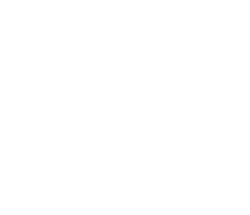

('', [])
KeyItem.TEAM_NAME   GameSide.LEFT


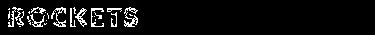

('ROCKETS', [92])
KeyItem.SHOTS_ON_GOAL   GameSide.LEFT
No transformation found


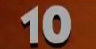

('10', [96])
KeyItem.HYPER_STRIKES   GameSide.LEFT
No transformation found


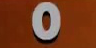

('0', [94])
KeyItem.ITEMS_USED   GameSide.LEFT
No transformation found


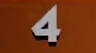

('4', [96])
KeyItem.TACKLES   GameSide.LEFT
No transformation found


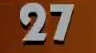

('27', [52])
KeyItem.PASSES   GameSide.LEFT
No transformation found


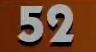

('52', [78])
KeyItem.INTERCEPTIONS   GameSide.LEFT
No transformation found


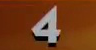

('4', [33])
KeyItem.ASSISTS   GameSide.LEFT
No transformation found


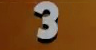

('3', [96])
KeyItem.POSESSION   GameSide.LEFT
No transformation found


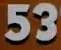

('53', [96])
KeyItem.SCORE   GameSide.RIGHT


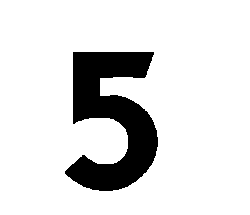

('5', [96])
KeyItem.TEAM_NAME   GameSide.RIGHT


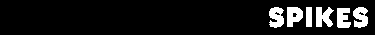

('SPIKES', [95])
KeyItem.SHOTS_ON_GOAL   GameSide.RIGHT
No transformation found


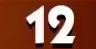

('12', [96])
KeyItem.HYPER_STRIKES   GameSide.RIGHT
No transformation found


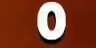

('0', [94])
KeyItem.ITEMS_USED   GameSide.RIGHT
No transformation found


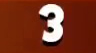

('3', [97])
KeyItem.TACKLES   GameSide.RIGHT
No transformation found


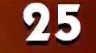

('25', [95])
KeyItem.PASSES   GameSide.RIGHT
No transformation found


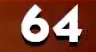

('64', [95])
KeyItem.INTERCEPTIONS   GameSide.RIGHT
No transformation found


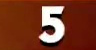

('5', [96])
KeyItem.ASSISTS   GameSide.RIGHT
No transformation found


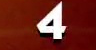

('4', [96])
KeyItem.POSESSION   GameSide.RIGHT
No transformation found


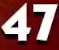

('47', [96])
KeyItem.SCOREBOARD_PASSES_CHECK   GameSide.NONE
No transformation found


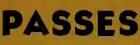

('', [])
KeyItem.WINNER   GameSide.LEFT
No transformation found


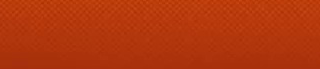

('', [])
KeyItem.WINNER   GameSide.RIGHT
No transformation found


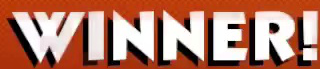

('WINNER!', [0])


In [4]:
im = Image.open(r"C:\wd\MSBL-Parser\notebooks\scoreboard2.jpg")
from src.parsing import tryParseKeyItem
for keyItem in keyItems:
    tryParseKeyItem(im, 0, game
    print(keyItem.keyItem, ' ', keyItem.side)
    transformed = imageTransformation(im.crop(keyItem.coords.box()), keyItem)
    display(transformed)
    print((transformed, GamePhase.END_GAME_SCOREBOARD, keyItem))

In [23]:
keyItems

[KeyItemDetail(coords=Coordinates(left=600, upper=100, right=850, lower=315), keyItem=<KeyItem.SCORE: 'SCORE'>, side=<GameSide.LEFT: 'LEFT'>, numbersOnly=True, tesserocrOptions={}, maximumDistanceForStoredImages=10),
 KeyItemDetail(coords=Coordinates(left=225, upper=25, right=600, lower=60), keyItem=<KeyItem.TEAM_NAME: 'TEAM_NAME'>, side=<GameSide.LEFT: 'LEFT'>, numbersOnly=False, tesserocrOptions={}, maximumDistanceForStoredImages=10),
 KeyItemDetail(coords=Coordinates(left=520, upper=406, right=585, lower=459), keyItem=<KeyItem.SHOTS_ON_GOAL: 'SHOTS_ON_GOAL'>, side=<GameSide.LEFT: 'LEFT'>, numbersOnly=True, tesserocrOptions={}, maximumDistanceForStoredImages=10),
 KeyItemDetail(coords=Coordinates(left=520, upper=480, right=585, lower=533), keyItem=<KeyItem.HYPER_STRIKES: 'HYPER_STRIKES'>, side=<GameSide.LEFT: 'LEFT'>, numbersOnly=True, tesserocrOptions={}, maximumDistanceForStoredImages=10),
 KeyItemDetail(coords=Coordinates(left=520, upper=554, right=585, lower=607), keyItem=<KeyIte

In [ ]:
from src.parsing import ImageStore
import os
store = ImageStore(os.path.join('..', 'src', 'data'), parseConfig.gamePhaseDetails, debug=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

for game,keyTimes in result.keyTimes.items():
    inGame = keyTimes[GamePhase.IN_GAME]
    times = [240-result.parsedFrames[idx].getValue(KeyItem.TIME, GameSide.NONE).total_seconds() for idx in inGame]
    scoresLeft = [result.parsedFrames[idx].getValue(KeyItem.SCORE, GameSide.LEFT) for idx in inGame]
    scoresRight = [result.parsedFrames[idx].getValue(KeyItem.SCORE, GameSide.RIGHT) for idx in inGame]
    print(inGame)
    print(scoresLeft)
    print(scoresRight)
    left = pd.DataFrame.from_dict({'time':times, 'score':scoresLeft})
    left['side'] = 'left'
    right = pd.DataFrame.from_dict({'time':times, 'score':scoresRight})
    right['side'] = 'right'
    df = pd.concat([left, right])
    sns.lineplot(data=df, x='time', y='score', hue='side')
    plt.show()


In [ ]:
for game, keyTime in result.keyTimes.items():
    print(game)
    if GamePhase.GOAL_SCORED_LEFT_HAND_SIDE in keyTime:
        print(GamePhase.GOAL_SCORED_LEFT_HAND_SIDE)
        for idx in keyTime[GamePhase.GOAL_SCORED_LEFT_HAND_SIDE]:
            print(f'\tTime:',':'.join(str(result.parsedFrames[idx].getValue(KeyItem.TIME, GameSide.NONE)).split(':')[-2:]))
    if GamePhase.GOAL_SCORED_RIGHT_HAND_SIDE in keyTime:
        print(GamePhase.GOAL_SCORED_RIGHT_HAND_SIDE)
        for idx in keyTime[GamePhase.GOAL_SCORED_RIGHT_HAND_SIDE]:
            print(f'\tTime:',':'.join(str(result.parsedFrames[idx].getValue(KeyItem.TIME, GameSide.NONE)).split(':')[-2:]))

In [ ]:
from src.parsing import imageTransformation
from PIL import Image
transformed = imageTransformation(Image.open('../test.jpg'), KeyItem.SCORE)
display(transformed)
#display(store._getHash(transformed))
print(store.lookupImageValue(transformed, debug=True)               )
